In [2]:
# Importa o Sympy
import sympy as sp

# Importa o Numpy
import numpy as np

# Importa o Matplot lib
import matplotlib.pyplot as plt

# Importa o módulo Toolbox
import Toolbox as T

In [ ]:
#Resolve Analitico
x = sp.symbols('x')
EI = sp.symbols('EI')
L = sp.symbols('L')
q0 = sp.symbols('q0')
c1,c2,c3,c4 = sp.symbols('c1 c2 c3 c4')

#Reações
Ra = sp.symbols('Ra')
Ma = sp.symbols('Ma')

# Eq = (q0/(24*EI))*(x**4) +c1*(x**3)/6 + c2*(x**2)/2 + c3*x+c4

v = (q0/(24*EI))*(x**4) +c1*(x**3)/6 + c2*(x**2)/2

# v,t = T.compatibiliza_cc_com_derivada(Eq,x,[c3,c4],[('valor',0,0),('derivada',x,0)])
# sp.pprint(v)



#Equilibrio estático:
Eq1 = Ra + sp.integrate(q0,(x,0,L))
Eq2 = Ma + sp.integrate(q0*x,(x,0,L))

solA1 = sp.solve([Eq1,Eq2],[Ra,Ma],dict=True)
sp.pprint(solA1)

#Finaliza sistema
M = EI*sp.diff(v,x,2).simplify()
V = -sp.diff(M,x).simplify()
# sp.pprint(V)
# sp.pprint(M)

Eq3 = (V.subs(x,L)).subs(solA1[0])
Eq4 = (M.subs(x,L)).subs(solA1[0])

solA2 = sp.solve([Eq3,Eq4],[c1,c2,c3,c4],dict=True)
# sp.pprint(solA2)
sp.pprint(v)

v = v.subs(solA2[0]).simplify()
sp.pprint(v)
sp.pprint(sp.latex(v))

vL = v.subs(x,L)
thetaL  = (sp.diff(v,x)).subs(x,L)

sp.pprint(vL.simplify())
sp.pprint(thetaL.simplify())


⎡⎧      2               ⎫⎤
⎢⎪    -L ⋅q₀            ⎪⎥
⎢⎨Ma: ───────, Ra: -L⋅q₀⎬⎥
⎢⎪       2              ⎪⎥
⎣⎩                      ⎭⎦
    3       2       4
c₁⋅x    c₂⋅x    q₀⋅x 
───── + ───── + ─────
  6       2     24⋅EI
    2 ⎛   2            2⎞
q₀⋅x ⋅⎝6⋅L  - 4⋅L⋅x + x ⎠
─────────────────────────
          24⋅EI          
\frac{q_{0} x^{2} \left(6 L^{2} - 4 L x + x^{2}\right)}{24 EI}
 4   
L ⋅q₀
─────
8⋅EI 
 3   
L ⋅q₀
─────
6⋅EI 
0
0


In [ ]:
x = sp.symbols('x')
EI = sp.symbols('EI')
L = sp.symbols('L')
q1,q2= sp.symbols('q1 q2')
q0 = sp.symbols('q0')

# Funções de forma Hermite
N1 = (2*x**3)/L**3 - (3*x**2)/L**2 + 1
N2 = (x**3)/L**2 - (2*x**2)/L + x
N3 = (3*x**2)/L**2 - (2*x**3)/L**3
N4 = (x**3)/L**2-(x**2)/L

# Vetor de funções de forma
N = sp.Matrix([N1, N2, N3, N4])

# Segunda derivada em x
d2N_dx2 = N.diff(x, 2)

B = d2N_dx2

# Integração simbólica da matriz de rigidez
K = sp.simplify(sp.integrate(B * B.T, (x, 0, L))) * EI
K = sp.Matrix(K)
sp.pprint(K)


Q = sp.Matrix([[(3*L*q2+7*L*q1)/20],[(2*(L**2)*q2+3*(L**2)*q1)/60],[(3*L*q1+7*L*q2)/20],[-(2*(L**2)*q1+3*(L**2)*q2)/60]])
Q = Q.subs(q1,q0).subs(q2,q0)
sp.pprint(Q)

⎡ 12⋅EI    6⋅EI   -12⋅EI    6⋅EI ⎤
⎢ ─────    ────   ───────   ──── ⎥
⎢   3        2       3        2  ⎥
⎢  L        L       L        L   ⎥
⎢                                ⎥
⎢ 6⋅EI     4⋅EI   -6⋅EI     2⋅EI ⎥
⎢ ────     ────   ──────    ──── ⎥
⎢   2       L        2       L   ⎥
⎢  L                L            ⎥
⎢                                ⎥
⎢-12⋅EI   -6⋅EI    12⋅EI   -6⋅EI ⎥
⎢───────  ──────   ─────   ──────⎥
⎢   3        2       3        2  ⎥
⎢  L        L       L        L   ⎥
⎢                                ⎥
⎢ 6⋅EI     2⋅EI   -6⋅EI     4⋅EI ⎥
⎢ ────     ────   ──────    ──── ⎥
⎢   2       L        2       L   ⎥
⎣  L                L            ⎦
⎡ L⋅q₀  ⎤
⎢ ────  ⎥
⎢  2    ⎥
⎢       ⎥
⎢  2    ⎥
⎢ L ⋅q₀ ⎥
⎢ ───── ⎥
⎢  12   ⎥
⎢       ⎥
⎢ L⋅q₀  ⎥
⎢ ────  ⎥
⎢  2    ⎥
⎢       ⎥
⎢  2    ⎥
⎢-L ⋅q₀ ⎥
⎢───────⎥
⎣  12   ⎦


In [5]:

#Aplicando as CCs, U[1]=0 e U[3] = 0
CCs = [1,2]
K_mod = K[2:,2:]
Q_mod = sp.zeros(2,1)
Q_mod[0] = Q[2]
Q_mod[1] = Q[3]
# K_mod = K
# Q_mod = Q
# K_mod = sp.zeros(2)
# Q_mod = sp.zeros(2,1)
# for l in range(len(CCs)):
#     glg = CCs[l]
#     # sp.pprint(glg)
#     #Zera linha e coluna da Matriz
#     for i in range(4):
#         K_mod[i,glg-1] = 0
#         K_mod[(glg-1),i] = 0
#     #Coloca 1 na diagonal
#     K_mod[glg-1,glg-1] = 1
    
#     Q_mod[glg-1] = 0

sp.pprint(K_mod)
sp.pprint(Q_mod)

⎡12⋅EI   -6⋅EI ⎤
⎢─────   ──────⎥
⎢  3        2  ⎥
⎢ L        L   ⎥
⎢              ⎥
⎢-6⋅EI    4⋅EI ⎥
⎢──────   ──── ⎥
⎢   2      L   ⎥
⎣  L           ⎦
⎡ L⋅q₀  ⎤
⎢ ────  ⎥
⎢  2    ⎥
⎢       ⎥
⎢  2    ⎥
⎢-L ⋅q₀ ⎥
⎢───────⎥
⎣  12   ⎦


In [12]:
U = K_mod.solve(Q_mod)
U = sp.Matrix([0,0]+list(U))
sp.pprint(sp.latex(U))

v_interpolado = (N.T * U)
sp.pprint(v_interpolado)
sp.pprint(sp.latex(v_interpolado[0].simplify()))

# sp.pprint(K)
# sp.pprint(Q)

Reacoes = K*U-Q
sp.pprint(sp.latex(Reacoes))


\left[\begin{matrix}0\\0\\\frac{L^{4} q_{0}}{8 EI}\\\frac{L^{3} q_{0}}{6 EI}\e ↪

↪ nd{matrix}\right]
⎡      ⎛   2      3⎞         ⎛   2    3⎞⎤
⎢ 4    ⎜3⋅x    2⋅x ⎟    3    ⎜  x    x ⎟⎥
⎢L ⋅q₀⋅⎜──── - ────⎟   L ⋅q₀⋅⎜- ── + ──⎟⎥
⎢      ⎜  2      3 ⎟         ⎜  L     2⎟⎥
⎢      ⎝ L      L  ⎠         ⎝       L ⎠⎥
⎢─────────────────── + ─────────────────⎥
⎣       8⋅EI                 6⋅EI       ⎦
\frac{L q_{0} x^{2} \left(5 L - 2 x\right)}{24 EI}
\left[\begin{matrix}- L q_{0}\\- \frac{L^{2} q_{0}}{2}\\0\\0\end{matrix}\right]


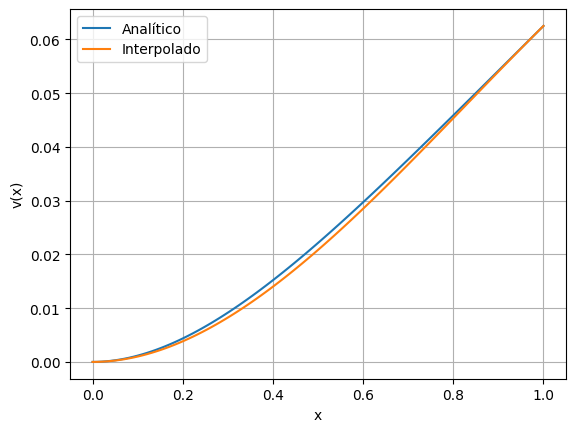

In [13]:
subb = {q0:500,EI:1000,L:1}
T.prepara_plot(v.subs(subb),x,0,1,'Analítico')
T.prepara_plot(v_interpolado[0].subs(subb),x,0,1,f'Interpolado')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.grid(True)
plt.legend()
plt.show()
